##  最具价值商品
本次分析数据有8个字段，具体说明如下：

| 字段              | 字段说明            | 提取说明                             | 
|-----------------|-----------------|----------------------------------|
|  InvoiceNO        |  发票编码           |  同一发票编码对应多种商品购买                      |
|  StockCode        |  商品标识           |  字段脱敏                           |
|  Description  |  对商品的描述     |    |
| Quantity   | 商品购买数量          | int                             |
| Invoice Date            | 购买时间            | 精确到小时级别                          |
| UnitPrice            | 商品单价            | float，俩位小数                          |
| CustomerID            | 客户用户id            |                           |
| Country            | 所在地区            |                           |
### 一. 数据导入预处理+特征工程

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from matplotlib.font_manager import FontProperties

# 设置中文字体为 SimHei，并解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

##### 1.1 导入数据

In [55]:
#导入Online Retail.xlsx 数据
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail', dtype=str, engine='calamine')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


##### 1.2 查看处理数据

In [56]:
display(df.info(),df.describe)
df.head(),


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCode    541909 non-null  object
 2   Description  540455 non-null  object
 3   Quantity     541909 non-null  object
 4   InvoiceDate  541909 non-null  object
 5   UnitPrice    541909 non-null  object
 6   CustomerID   406829 non-null  object
 7   Country      541909 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


None

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
1         536365     71053                  WHITE METAL LANTERN        6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   
...          ...       ...                                  ...      ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS       12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL         6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE        4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT         3   

                InvoiceDate UnitPrice CustomerID     

(  InvoiceNo StockCode                          Description Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
 1    536365     71053                  WHITE METAL LANTERN        6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   
 
            InvoiceDate UnitPrice CustomerID         Country  
 0  2010-12-01 08:26:00      2.55      17850  United Kingdom  
 1  2010-12-01 08:26:00      3.39      17850  United Kingdom  
 2  2010-12-01 08:26:00      2.75      17850  United Kingdom  
 3  2010-12-01 08:26:00      3.39      17850  United Kingdom  
 4  2010-12-01 08:26:00      3.39      17850  United Kingdom  ,)

In [57]:
df.dtypes


InvoiceNo      object
StockCode      object
Description    object
Quantity       object
InvoiceDate    object
UnitPrice      object
CustomerID     object
Country        object
dtype: object

In [58]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [59]:
#删除重复值
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [60]:
df[df["InvoiceNo"]=='A563185']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


商品编号为A563185的数据出现异常，单价为11062.06元，查询可知，该条记录描述为Adjust bad debt,即坏账调整记录，故删去。

In [61]:
# 删除 InvoiceNo 为 A563185 的行
df = df[df["InvoiceNo"] != 'A563185']

缺失数据均为商品描述（description）与顾客id（customerID），与所研究的最具价值商品的特征无关，可忽略。

In [62]:
# 数据类型转化
# 指定要转换的列名
#columns_to_convert = [ 'Quantity', 'UnitPrice']

# 遍历并转换每一列
# for col in columns_to_convert:
#     try:
#         df[col] = df[col].astype('float64')
#     except ValueError:
#         print(f"无法将列 {col} 转换为 float64 类型。请检查数据，可能存在非整数值。")

df.Quantity = df.Quantity.astype('int')
df.UnitPrice = df.UnitPrice.astype('float64')
df.InvoiceNo = df.InvoiceNo.astype('string')
df.StockCode = df.StockCode.astype('string')
df.Description = df.Description.astype('string')
df.CustomerID = df.CustomerID.astype('string')
df.Country = df.Country.astype('string')

#日期切割
df['Date'] = df['InvoiceDate'].apply(lambda x: x.split(' ')[0])
df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])
df['Month'] = df['Date'].apply(lambda x: x.split('-')[1])
df['Day'] = df['Date'].apply(lambda x: x.split('-')[2])


#日期转化pd.to_datetime()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = pd.to_datetime(df['Date'])

# 将数量为负的记录视为退货，从数据中去除
df = df[df['Quantity'] > 0]

# 将单价为负的记录去除
df = df[df['UnitPrice'] > 0]

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010,12,01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010,12,01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010,12,01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010,12,01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010,12,01


In [63]:
df[df['StockCode'] == '23843']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,2011-12-09,2011,12,09


In [64]:
df.dtypes

InvoiceNo      string[python]
StockCode      string[python]
Description    string[python]
Quantity                int32
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country        string[python]
Date           datetime64[ns]
Year                   object
Month                  object
Day                    object
dtype: object

In [65]:
print("数据总览：",df.shape)
#print("用户数：",df['CustomerID'].nunique())
print('商品数：',df['StockCode'].nunique())
print(f"时间跨度：{df['Date'].min()} - {df['Date'].max()}")

数据总览： (524877, 12)
商品数： 3921
时间跨度：2010-12-01 00:00:00 - 2011-12-09 00:00:00


可知，该数据统计的是在2010-12-1至2010-12-09为期9天的商品购买情况。共计包含52.4w条消费记录，商品总数近4000.数据样本量足以支撑后续的数据挖掘分析与可视化。

### 二.最受欢迎的商品
##### 2.1 购买总数分析

In [66]:
#查看最受欢迎的前十种商品极其购买总数
popular_item = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).reset_index().rename(columns={'Quantity': 'TotalQuantity'})
popular_item.head(10)


,StockCode,TotalQuantity
0,23843,80995
1,23166,78033
2,22197,56898
3,84077,54951
4,85099B,48371
5,85123A,37641
6,21212,36396
7,84879,36362
8,23084,30739
9,22492,26633


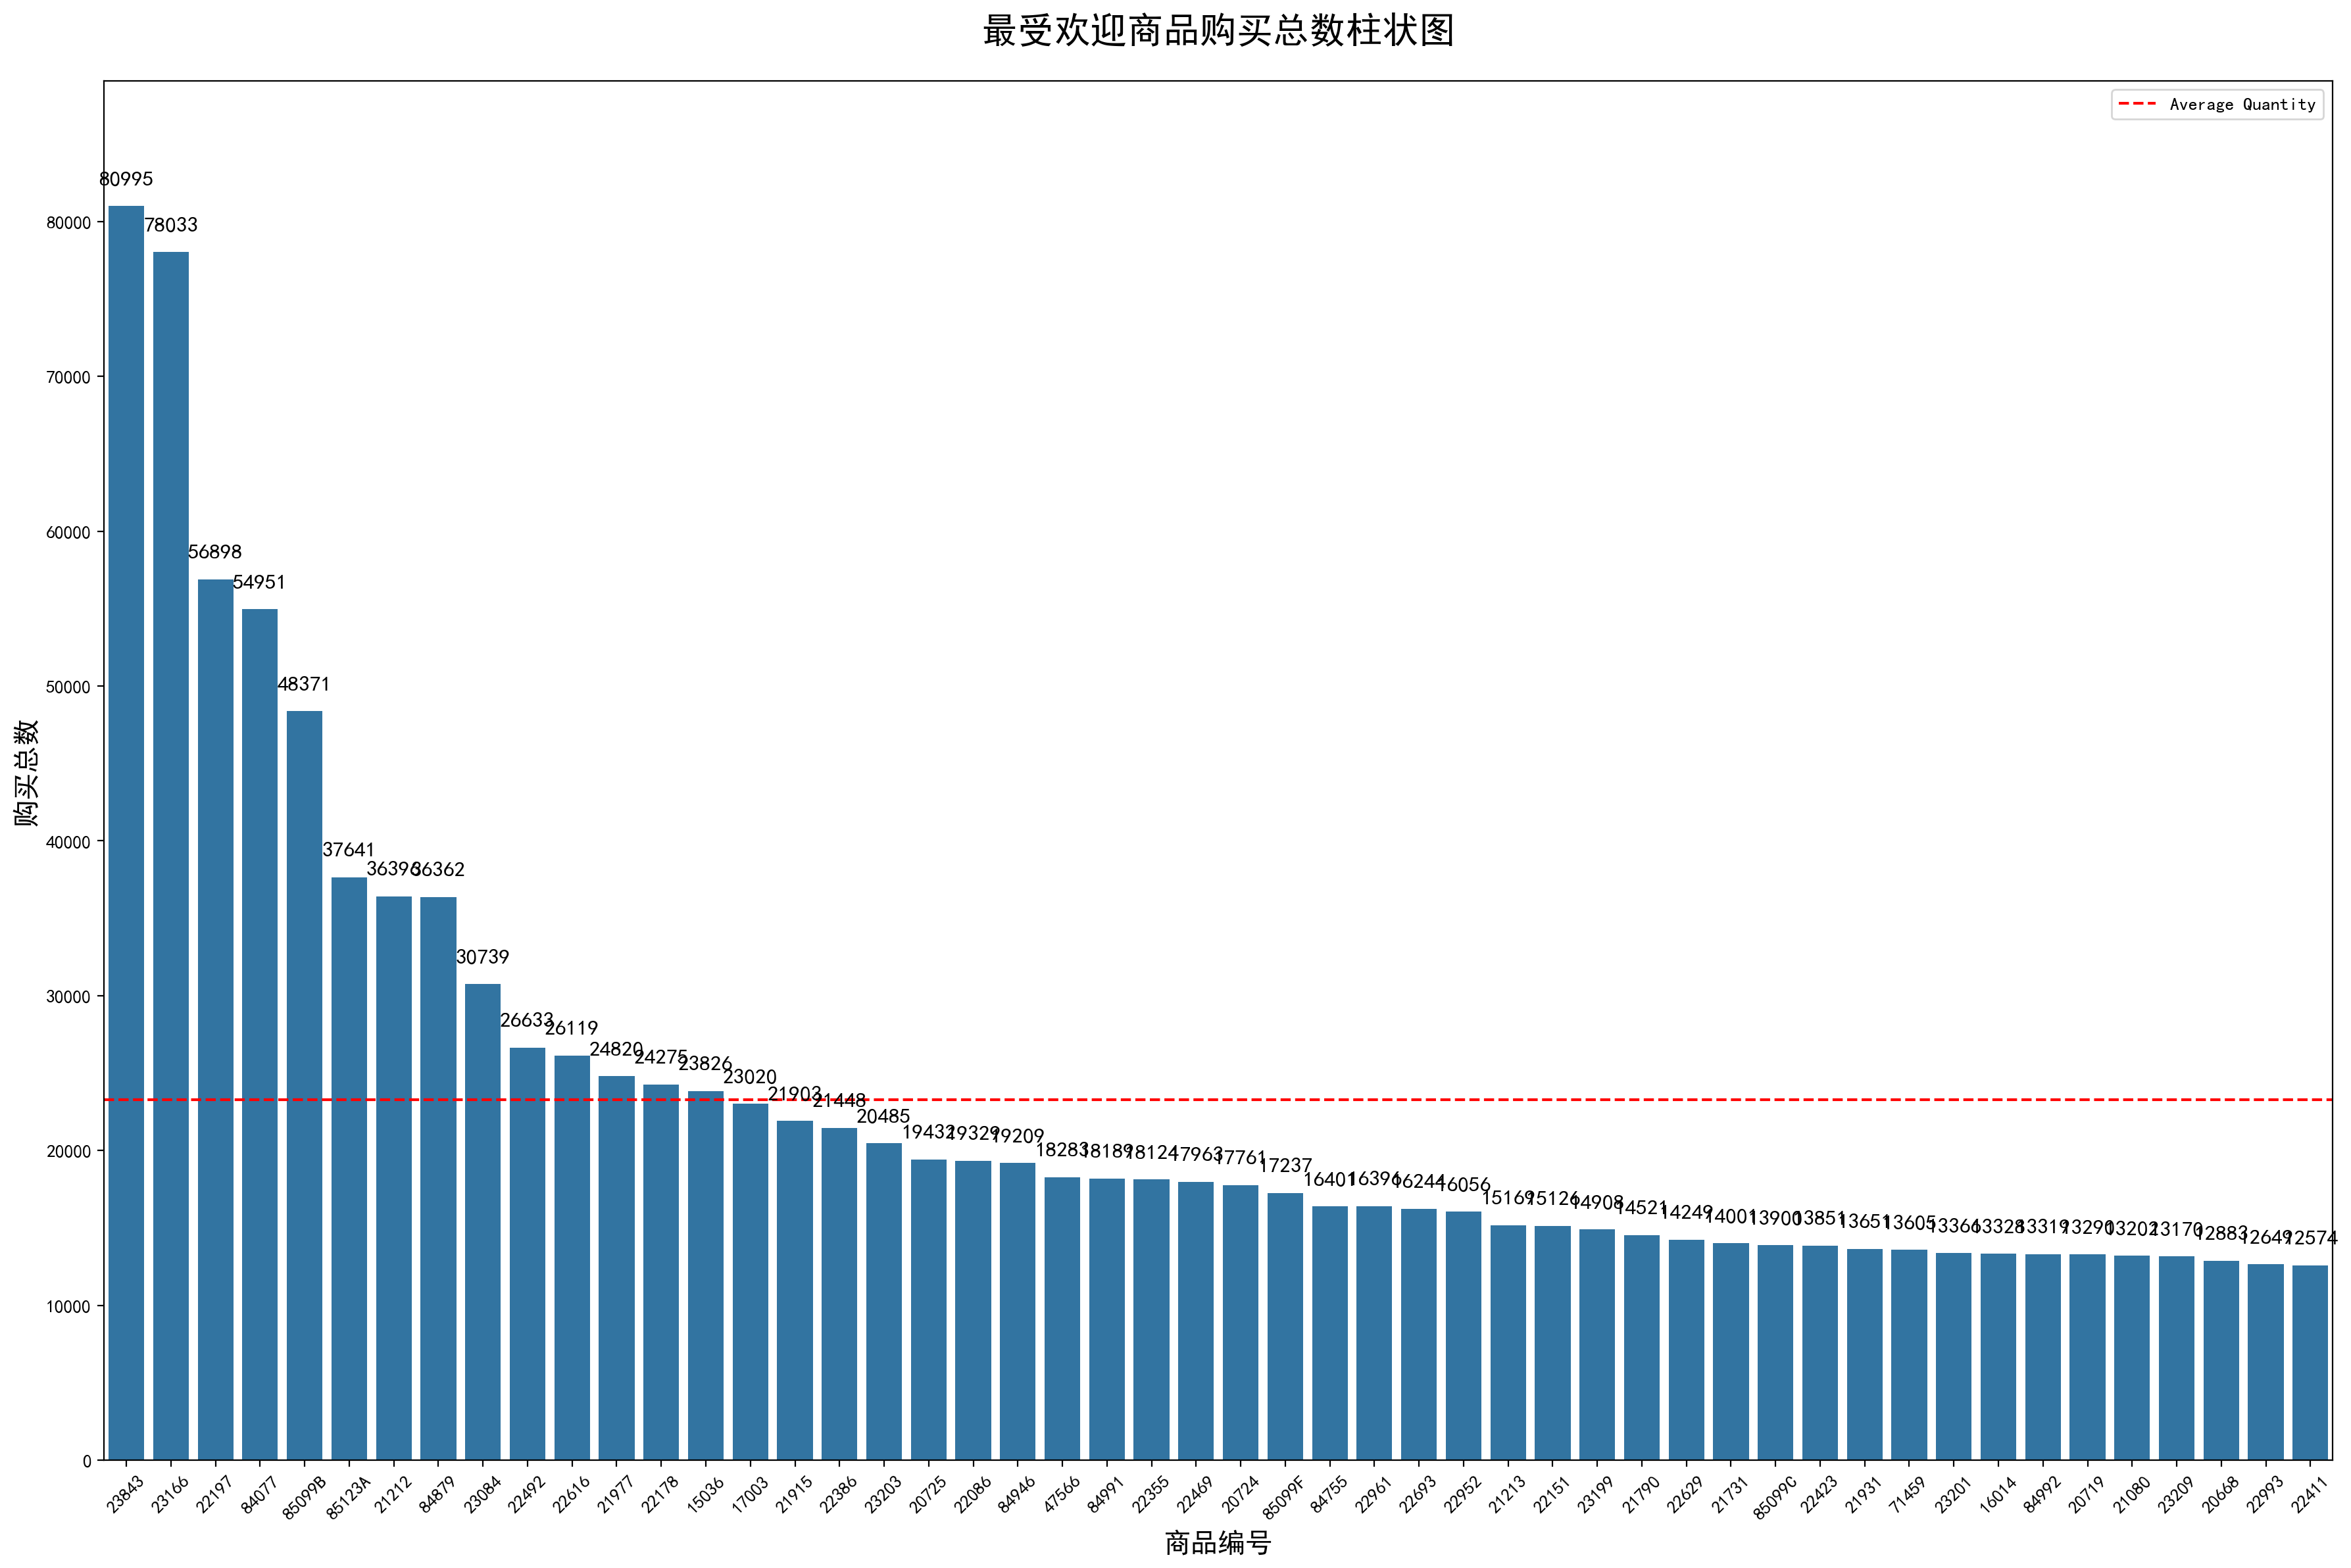

最受欢迎的前五十种商品中的平均购买数是： 23286.02


In [67]:

#数据可视化
plt.figure(figsize = (18,12),dpi=200)
ax = sns.barplot(x='StockCode',y='TotalQuantity',data=popular_item.head(50))
for container in ax.containers:
    ax.bar_label(container,size = 12,padding =10)

#绘制平均购买水平线
quantity_mean = popular_item.head(50)['TotalQuantity'].mean()
plt.axhline(y=quantity_mean,color='red',linestyle='--',label='Average Quantity')

plt.xticks(rotation=45)
plt.title('最受欢迎商品购买总数柱状图',fontsize = 20,y  = 1.02)
plt.ylim(0, popular_item.TotalQuantity.max()*1.1)
plt.xlabel('商品编号',fontsize = 15)
plt.ylabel('购买总数',fontsize = 15)
plt.legend()
plt.tight_layout()
plt.show()
print("最受欢迎的前五十种商品中的平均购买数是：",quantity_mean)

- 头部商品极为突出  
排名前两位的商品（如80995、78033）购买总数远高于其他商品，属于超级畅销品，是店铺的主力商品。这类商品对整体销售额和客户粘性有重要影响，建议重点关注其库存、供应链和促销策略。  
- 销量分布呈现长尾效应  
前10名商品的销量明显高于后面商品，说明销售集中度较高。  
但从第10名以后，销量逐步递减，说明还有大量商品有一定销量，形成“长尾”。  
可以考虑对长尾商品进行差异化运营，比如捆绑销售、清仓促销等。
- 红线-平均线（23286.02）意义  
红色虚线代表前50名商品的平均购买量。  
超过平均线的商品为“高于平均水平”的热销品，低于平均线的商品则为“普通热销品”。  
可以将高于平均线的商品作为重点推广对象。  


##### 2.1 购买频次分析

In [68]:
# 提取购买频次前十的商品id
frequent_item = df.groupby('StockCode')['InvoiceNo'].count().sort_values(ascending=False).reset_index().rename(columns={'InvoiceNo':'frequency'})
frequent_item.head(10)

,StockCode,frequency
0,85123A,2253
1,85099B,2109
2,22423,2007
3,47566,1699
4,20725,1582
5,84879,1476
6,22197,1418
7,22720,1392
8,21212,1352
9,22383,1306


In [69]:
print(frequent_item.head(50))

   StockCode  frequency
0     85123A       2253
1     85099B       2109
2      22423       2007
3      47566       1699
4      20725       1582
5      84879       1476
6      22197       1418
7      22720       1392
8      21212       1352
9      22383       1306
10     20727       1301
11     22457       1255
12     23203       1242
13     22386       1232
14     22469       1219
15     21931       1194
16     22086       1184
17     22411       1180
18     22961       1164
19     22382       1164
20     20728       1162
21     23298       1161
22     22960       1133
23      POST       1126
24     22666       1119
25     23209       1114
26     82482       1106
27     22384       1101
28     22993       1090
29     22699       1073
30     22727       1061
31     23206       1053
32     20724       1044
33     22178       1041
34     20726       1030
35     22697       1022
36     23084       1017
37     21080       1005
38     22726        989
39     23199        986
40     22077    

平均购买频次：1190.16


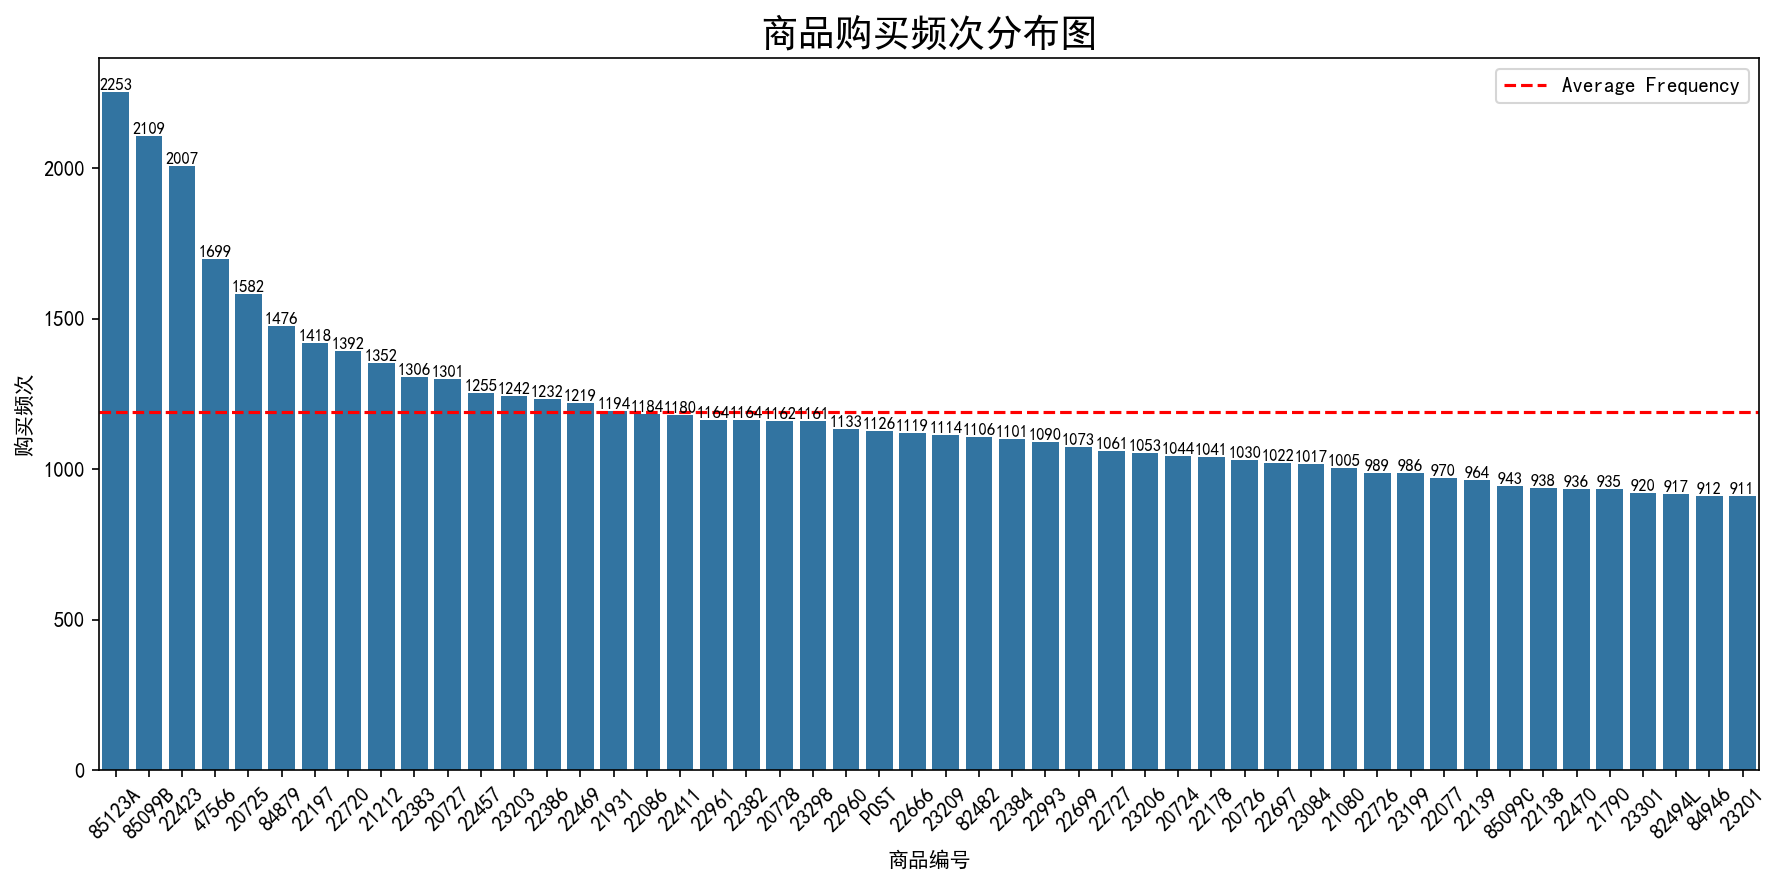

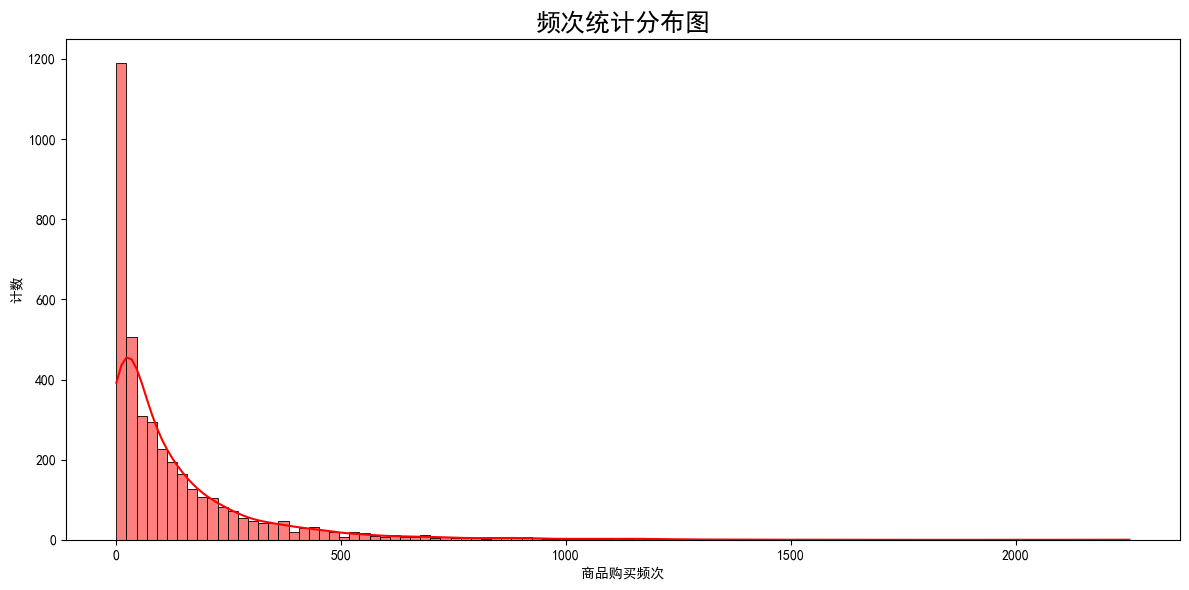

In [70]:
# # frequency可视化

plt.figure(figsize=(12, 6), dpi=150)

ax = sns.barplot(x='StockCode', y='frequency', data=frequent_item.head(50))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=8)

frequency_mean = frequent_item.head(50)['frequency'].mean()
plt.axhline(y=frequency_mean, color='red', linestyle='--', label='Average Frequency')

plt.title('商品购买频次分布图', fontsize=18)
plt.xlabel('商品编号')
plt.ylabel('购买频次')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
print(f'平均购买频次：{frequency_mean:.2f}')

# 频次统计分布图
plt.figure(figsize=(12, 6), dpi=100)
sns.histplot(frequent_item['frequency'], bins=100, color='r', kde=True)
plt.title('频次统计分布图', fontsize=18)
plt.xlabel('商品购买频次')
plt.ylabel('计数')
plt.tight_layout()
plt.show()




商品购买频次分布图分析：
- 头部商品极为突出  
排名前三的商品（如85123A、85099B、82482）购买频次远高于其他商品，属于“超级热销品”，是店铺的主力商品。
- 平均线参考  
红色虚线为前50名商品的平均购买频次。高于平均线的商品为重点热销品，低于平均线的商品为普通热销品。
- 长尾效应明显  
前几名商品的购买频次远超后面商品，后续商品频次逐步递减，说明销售集中度高，但也存在大量“腰部”和“尾部”商品。

频次统计分布图：
- 绝大多数商品购买频次很低  
频次低于100的商品数量最多，说明大部分商品被购买的次数很少。
- 极少数商品频次极高  
右侧长尾部分显示，只有极少数商品购买频次超过1000次，进一步印证了头部商品的主导地位。
- 分布极度偏斜  
频次分布呈现典型的幂律分布（长尾分布），即“少数商品贡献了大部分购买行为”。

##### 2.3 商品总体分析（考虑TotalQuantity与frequency）

In [71]:
#查看购买数量TotalQuantity最大的商品的购买频次以及最大购买频次frequency的商品的购买总数
top_n = 100
popular_StockCode = popular_item.head(top_n)['StockCode'].tolist()
frequent_StockCode = frequent_item.head(top_n)['StockCode'].tolist()
print(popular_StockCode)
print(f'购买数量TotalQuantity最大的Top{top_n}的商品的购买频次分别为：')
df1 = frequent_item[frequent_item['StockCode'].isin(popular_StockCode)]
df1['StockCode'] = pd.Categorical(df1['StockCode'], categories=popular_StockCode, ordered=True)
display(df1.sort_values('StockCode'))

print(f'购买频次frequency最大的Top{top_n}的商品的购买总数分别为：')
df2 = popular_item[popular_item['StockCode'].isin(frequent_StockCode)]
df2['StockCode'] = pd.Categorical(df2['StockCode'], categories=frequent_StockCode, ordered=True)
display(df2.sort_values('StockCode'))

# 比较商品种类TOP100购买总数与购买频次的交集
print('在商品种类购买总数TOP100中，有'+str(len(set(popular_item.head(top_n)['StockCode'])&set(frequent_item.head(top_n)['StockCode'])))+'件商品种类的购买频次也是TOP100')


['23843', '23166', '22197', '84077', '85099B', '85123A', '21212', '84879', '23084', '22492', '22616', '21977', '22178', '15036', '17003', '21915', '22386', '23203', '20725', '22086', '84946', '47566', '84991', '22355', '22469', '20724', '85099F', '84755', '22961', '22693', '22952', '21213', '22151', '23199', '21790', '22629', '21731', '85099C', '22423', '21931', '71459', '23201', '16014', '84992', '20719', '21080', '23209', '20668', '22993', '22411', '22969', '22383', '84978', '84568', '22998', '21975', '21181', '21175', '20727', '23206', '23310', '23307', '21232', '20728', '22630', '21137', '22659', '20713', '21929', '20971', '23202', '22577', '22910', '84945', '21326', '21498', '22384', '21928', '22578', '22382', '23077', '21166', '84212', '79321', '23344', '21108', '20726', '22470', '22699', '20723', '20712', '22489', '22356', '22610', '84347', '21703', '22077', '22457', '22988', '82482']
购买数量TotalQuantity最大的Top100的商品的购买频次分别为：


,StockCode,frequency
3831,23843,1
617,23166,250
6,22197,1418
167,84077,536
1,85099B,2109
...,...,...
485,21703,298
40,22077,970
11,22457,1255
271,22988,422


购买频次frequency最大的Top100的商品的购买总数分别为：


,StockCode,TotalQuantity
5,85123A,37641
4,85099B,48371
38,22423,13851
21,47566,18283
18,20725,19432
...,...,...
216,84380,5799
173,22907,6573
184,84378,6332
109,22385,8666


在商品种类购买总数TOP100中，有60件商品种类的购买频次也是TOP100


由输出结果可见：  
- 大部分畅销商品(Top100中存在60种)无论是在购买总数（TotalQuantity）还是购买频次（frequency）上，都名列前茅.  
如StockCode为85123A的商品，购买总数排第6位，购买频次也位居第五位、StockCode为85099B的商品，购买总数为第五位，购买频次为第二位...这些商品属于超级畅销商品，可以着重推广。
- 少数商品在购买总数（TotalQuantity）与购买频次（frequency）上呈现俩个极端。  
例如，商品编号（StockCode）为23843的商品，购买总数高达80995，位居所有商品第一位，但其购买频次仅有1次，位居3846位，销售情况呈现两极分化。

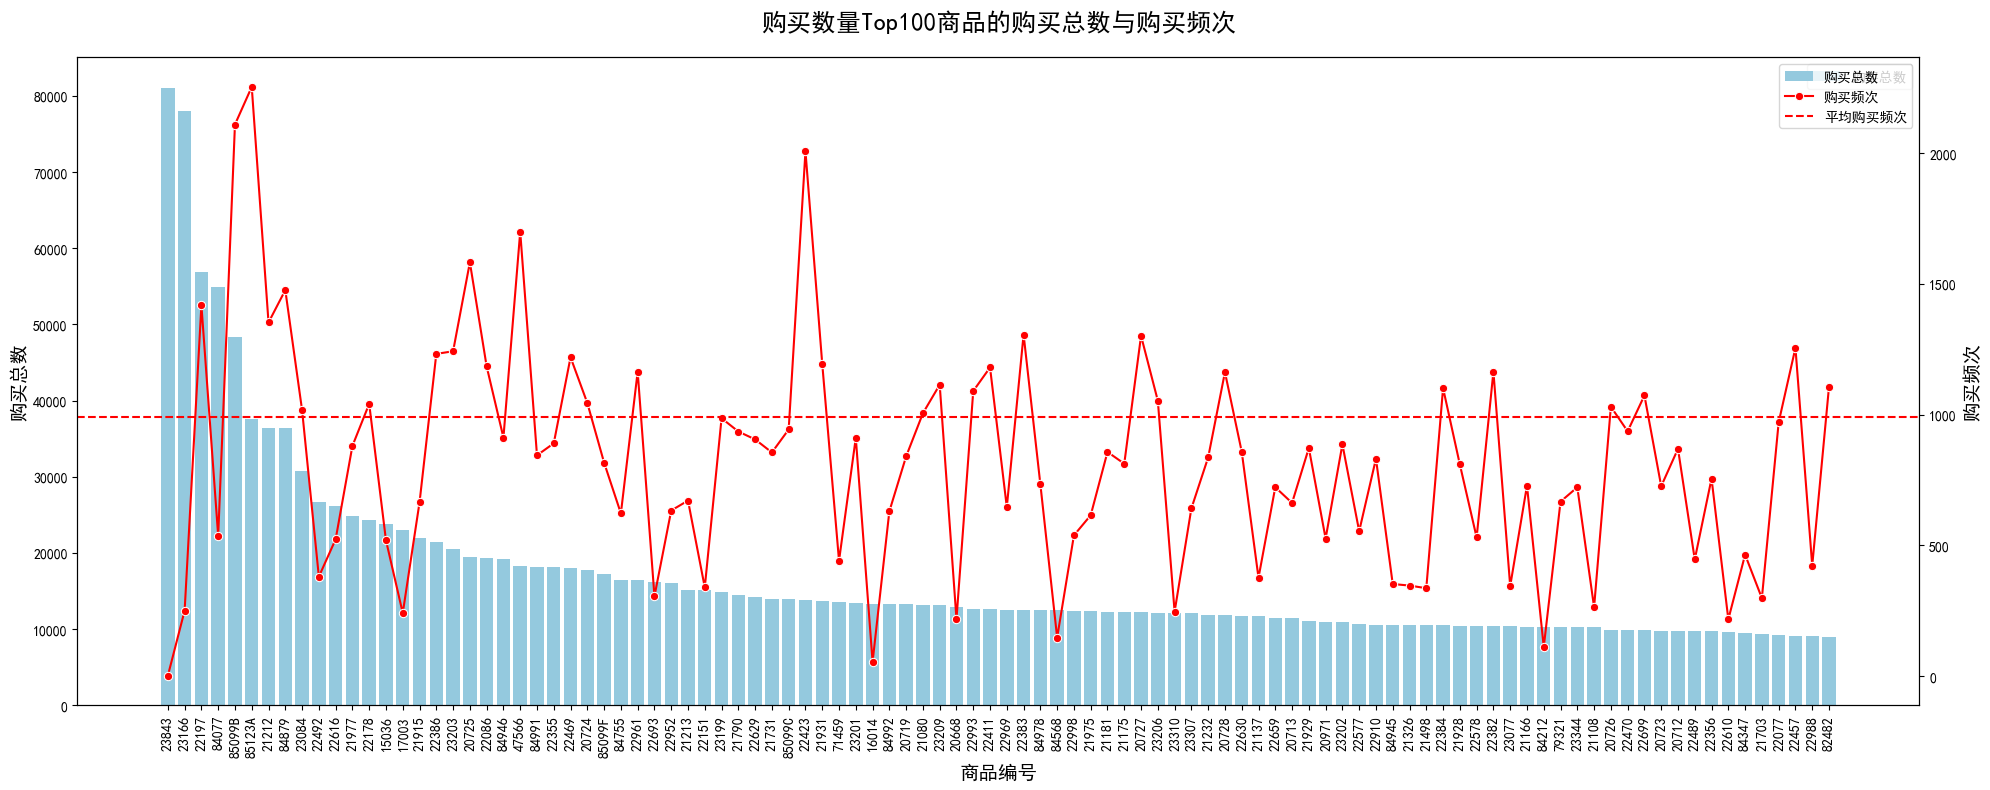

In [72]:
# 构建包含TotalQuantity和frequency的DataFrame
top100_df = popular_item.head(top_n).merge(
    frequent_item[['StockCode', 'frequency']],
    on='StockCode',
    how='left'
)

plt.figure(figsize=(20, 8))
# 柱状图：购买总数
ax = sns.barplot(x='StockCode', y='TotalQuantity', data=top100_df, color='skyblue', label='购买总数')
# 折线图：购买频次
ax2 = ax.twinx()
sns.lineplot(x='StockCode', y='frequency', data=top100_df, color='red', marker='o', ax=ax2, label='购买频次')

#Top100商品的平均频次水平线
frequency_mean = frequent_item.head(top_n)['frequency'].mean()
plt.axhline(y=frequency_mean, color='red', linestyle='--', label='平均购买频次')


ax.set_xlabel('商品编号', fontsize=14)
ax.set_ylabel('购买总数', fontsize=14)
ax2.set_ylabel('购买频次', fontsize=14)
plt.title(f'购买数量Top{top_n}商品的购买总数与购买频次', fontsize=18,y = 1.03)
ax.set_xticklabels(top100_df['StockCode'], rotation=90)

# 图例
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

商家可重点关注购买总数和频次双高的商品，加大推广和库存管理；对购买总数高但频次低的商品，研究如何提升复购率；对频次高总数低的商品，思考如何扩大单次购买量。

#### 2.4 最受欢迎的top100商品
由上述初步分析可知，商品销售的俩个维度（TotalQuantity与frequency存在较大差异），现在需要综合考虑俩个维度，输出最受欢迎的top100商品。算法方案如下：  
- 维度分箱   
    将不同维度进行分箱（pd.cut(bins = )），比如TotalQuantity分箱为1-2500、2501-5000、5001-7500、7501-10000、10000-15000、15001-20000、20000-max;frequency分箱为1-300、301-600、601-900、901-1200、1201-1500、1501-1800、1801-max。  分别赋予1-7的分值，设置购买总数与购买频次的权重（默认0.5-0.5），求和，排序，前100即为top100商品.  
缺点：分箱的分值设置凭感觉，且数据分布为头部效应与分箱效应明显，整体评分容易被某一个维度的分值打乱，导致top100商品分布不均。

- 数据标准化（from sklearn.preprocessing import MinMaxScaler）  
    将数据俩个维度进行标准化处理，将数据映射到固定范围，便于比较不同特征的权重，且不会过度放大头部数据的影响。 
    设置相应的权重（默认0.5-0.5）  
    求和、排序、得到top100的畅销商品

    - 既要考虑头部商品的重要性，又要避免尾部商品完全失去影响力，建议使用 MinMaxScaler，因为它可以将数据缩放到统一范围，便于后续综合评分时平衡头部和尾部商品的权重。

In [73]:
#数据标准化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
popular_item['TotalQuantity_scaled'] = scaler.fit_transform(popular_item[['TotalQuantity']])
frequent_item['frequency_scaled'] = scaler.fit_transform(frequent_item[['frequency']])
popular_item.head(), frequent_item.head()


(  StockCode  TotalQuantity  TotalQuantity_scaled
 0     23843          80995                  1.00
 1     23166          78033                  0.96
 2     22197          56898                  0.70
 3     84077          54951                  0.68
 4    85099B          48371                  0.60,
   StockCode  frequency  frequency_scaled
 0    85123A       2253              1.00
 1    85099B       2109              0.94
 2     22423       2007              0.89
 3     47566       1699              0.75
 4     20725       1582              0.70)

,index,StockCode,TotalQuantity_scaled,frequency_scaled,score
0,4,85099B,0.60,0.94,0.77
1,5,85123A,0.46,1.00,0.73
2,2,22197,0.70,0.63,0.67
3,7,84879,0.45,0.65,0.55
4,1,23166,0.96,0.11,0.54
...,...,...,...,...,...
95,771,21034,0.02,0.40,0.21
96,212,23355,0.07,0.35,0.21
97,55,21975,0.15,0.27,0.21
98,161,23300,0.08,0.34,0.21


综合评分前100的商品种类(最受欢迎商品)为： ['85099B', '85123A', '22197', '84879', '23166', '22423', '21212', '23843', '47566', '20725', '84077', '23084', '22386', '23203', '22086', '22469', '22178', '22383', '20727', '22961', '22720', '21931', '21977', '20724', '22411', '22457', '20728', '23209', '22382', '84946', '22993', '23199', '23298', '22355', '22384', '23206', '22960', '21080', '82482', '84991', '22666', '22699', '21790', '85099C', '20726', '22629', '85099F', '23201', '22727', '21915', '22616', '21731', '22077', '22697', 'POST', '22470', '20719', '21181', '23202', '22630', '15036', '21929', '22726', '21232', '23301', '21175', '20712', '22910', '22492', '82494L', '21928', '21213', '22139', '84978', '22952', '84755', '22138', '20914', '23245', '22659', '22112', '22356', '22558', '21166', '22722', '22090', '23344', '84992', '20723', '22969', '20713', '23307', '23207', '21733', '22326', '21034', '23355', '21975', '23300', '79321', '22379', '22728', '22385', '22554', '22698', '22111', '22467', '85152',

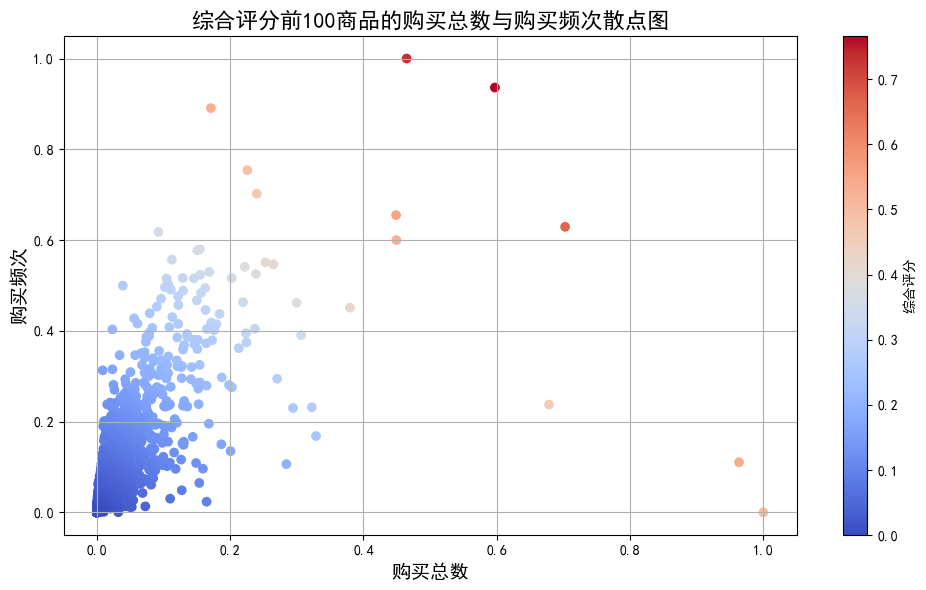

In [74]:
# 按照 StockCode 合并两个 DataFrame
merged_items = popular_item[['StockCode', 'TotalQuantity_scaled']].merge(
    frequent_item[['StockCode', 'frequency_scaled']],
    on='StockCode',
    how='inner'
)

# 计算综合评分（默认权重均为 0.5）
merged_items['score'] = 0.5 * merged_items['TotalQuantity_scaled'] + 0.5 * merged_items['frequency_scaled']

# 按照综合评分排序
top_100_items = merged_items.sort_values(by='score', ascending=False).reset_index(inplace=False)

# 查看结果
display(top_100_items.head(top_n))
print(f'综合评分前{top_n}的商品种类(最受欢迎商品)为：', top_100_items['StockCode'].tolist())

#绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(merged_items['TotalQuantity_scaled'], merged_items['frequency_scaled'], c=merged_items['score'], cmap='coolwarm')
plt.colorbar(label='综合评分')
plt.title(f'综合评分前{top_n}商品的购买总数与购买频次散点图', fontsize=16)
plt.xlabel('购买总数', fontsize=14)
plt.ylabel('购买频次', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


### 三. 销量预测（ARIMA时序模型）
ARIMA模型，全称为自回归积分滑动平均模型（Autoregressive Integrated Moving Average Model），是一种被广泛应用于时间序列数据分析和预测的统计模型。ARIMA模型能够描述时间序列数据的自回归特性和滑动平均特性，并通过差分方法使非平稳时间序列数据变得平稳，从而进行有效的预测。  
ARIMA模型的组成

ARIMA模型由三部分组成：

- 自回归（AR）：模型利用数据的前期值来预测当前值，其中“p”代表模型中自回归项的数量。

- 差分（I）：为了使时间序列平稳，需要对原始数据进行一定次数的差分处理，其中“d”代表差分次数。

- 滑动平均（MA）：模型使用预测误差的前期值来改进当前值的预测，其中“q”代表模型中滑动平均项的数量。

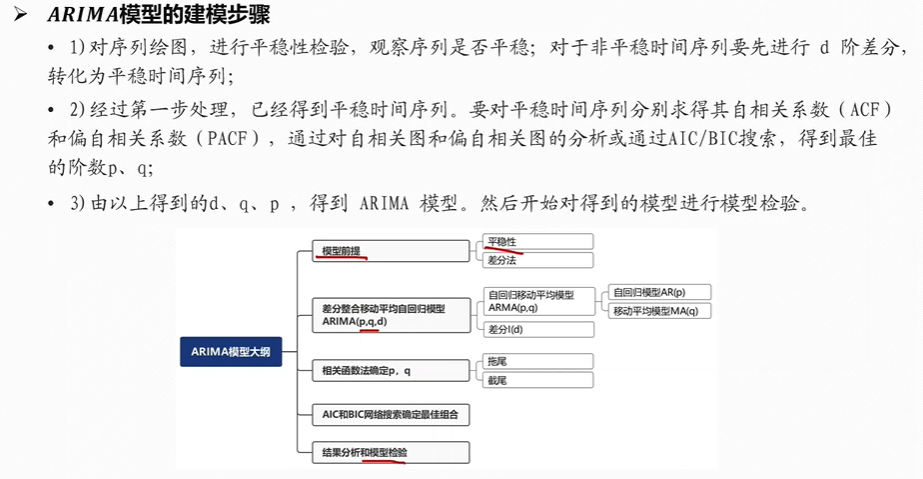
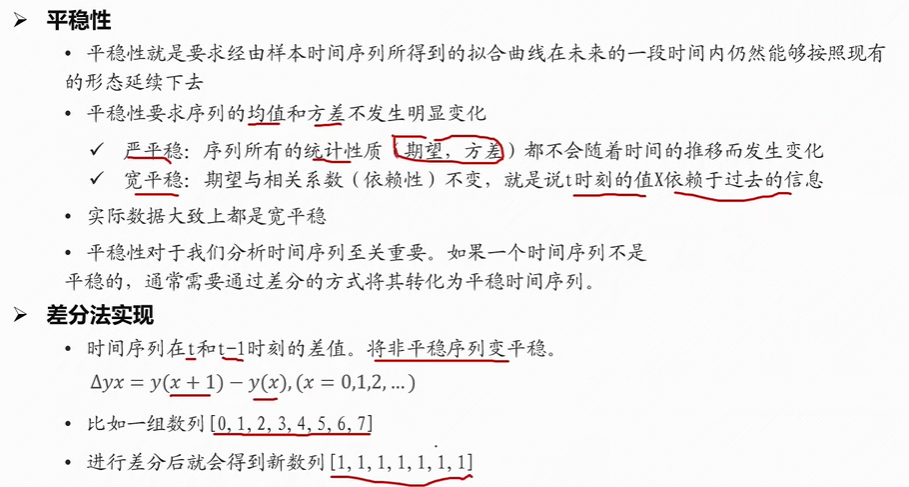

In [75]:
import os
import warnings
import datetime as dt
import math
 
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX

from IPython.display import Image
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from statsmodels.tsa.stattools import adfuller  # adf检验库
from statsmodels.stats.diagnostic import acorr_ljungbox  # 随机性检验库
from statsmodels.tsa.arima_model import ARMA 
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") 



In [76]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010,12,01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010,12,01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010,12,01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010,12,01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010,12,01


In [77]:
df.dtypes


InvoiceNo      string[python]
StockCode      string[python]
Description    string[python]
Quantity                int32
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country        string[python]
Date           datetime64[ns]
Year                   object
Month                  object
Day                    object
dtype: object

In [78]:
df['InvoiceNo'].nunique()

19959

#### 3.1 数据处理
为简化运算起见，先对数据进行处理：  
- 不区分地区差异，而是对整个平台销量进行预测  
- 销量采用总盈利衡量（单价*数量）  
- 以日期为单位对数据进行重采样（resample（‘D’））

In [79]:
#数据预处理（）
#计算每个发票的购买金额（单价UnitPrice*数量Quantity），并汇总
df['Amount'] = df['UnitPrice'] * df['Quantity']
df_Invoice = df.groupby('InvoiceNo').agg({'Amount': 'sum', 'InvoiceDate': 'first'}).reset_index()
df_Invoice['InvoiceDate'] = pd.to_datetime(df_Invoice['InvoiceDate'])
# 以每天为时间区间。聚合汇总每天的销售总额
df_Invoice.set_index('InvoiceDate', inplace=True)
df_Invoice = df_Invoice.resample('D').sum().reset_index()
df_Invoice.drop('InvoiceNo', axis=1, inplace=True)  # 删除 InvoiceNo 列，因为它在每小时聚合中没有意义

df_Invoice.rename(columns = {'InvoiceDate':'timestamp','Amount':'total_amount'},inplace=True)

# 将时间戳设置为索引
df_Invoice.set_index('timestamp',inplace=True)

df_Invoice


,total_amount
timestamp,
2010-12-01,"58,776.79"
2010-12-02,"47,629.42"
2010-12-03,"46,898.63"
2010-12-04,0.00
2010-12-05,"31,364.63"
...,...
2011-12-05,"88,620.84"
2011-12-06,"56,558.83"
2011-12-07,"75,315.55"


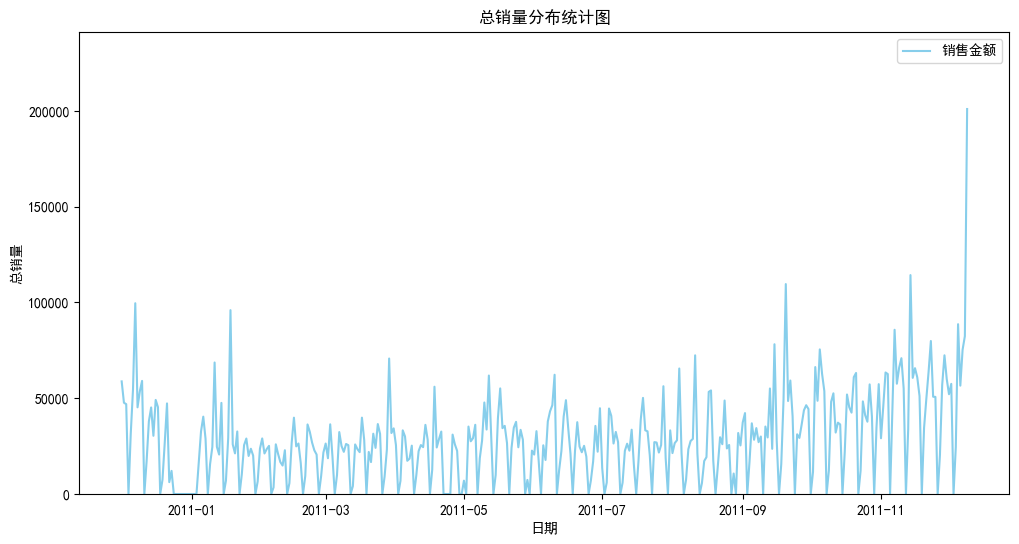

In [80]:
# 数据可视化

plt.plot(df_Invoice.index, df_Invoice['total_amount'], label='销售金额', color='skyblue')
plt.xlabel('日期')
plt.ylabel('总销量')
plt.title('总销量分布统计图')
plt.ylim(0, df_Invoice['total_amount'].max() * 1.2)
plt.legend()
plt.show()

In [81]:
# 查看异常数据（2011-12-09）
df[df['InvoiceDate'].dt.date == dt.date(2011, 12, 9)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,Amount
540277,581475,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,36,2011-12-09 08:39:00,0.39,13069,United Kingdom,2011-12-09,2011,12,09,14.04
540278,581475,23235,STORAGE TIN VINTAGE LEAF,12,2011-12-09 08:39:00,1.25,13069,United Kingdom,2011-12-09,2011,12,09,15.00
540279,581475,23272,TREE T-LIGHT HOLDER WILLIE WINKIE,12,2011-12-09 08:39:00,0.39,13069,United Kingdom,2011-12-09,2011,12,09,4.68
540280,581475,23239,SET OF 4 KNICK KNACK TINS POPPIES,6,2011-12-09 08:39:00,1.65,13069,United Kingdom,2011-12-09,2011,12,09,9.90
540281,581475,21705,BAG 500g SWIRLY MARBLES,24,2011-12-09 08:39:00,0.39,13069,United Kingdom,2011-12-09,2011,12,09,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09,2011,12,09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09,2011,12,09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09,2011,12,09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09,2011,12,09,16.60


- 初步看来，2011-12-09的数据很正常，成交订单数较多,有1618条，且订单金额较为平均，无异常，是真实业务波动的体现，反映了市场真实情况，删除会丢失重要信息，使模型无法捕捉到这种极端但合理的波动情况。故而选择保留。  
- 此外，存在部分成交总额为0的天数(每七天会出现一天销售额为0，猜测可能原因为平台周日放假等原因)，数据为 0 可能真实反映了业务实际情况，比如当天未产生销售，或者平台维护等，这是业务信息的一部分，删除会破坏数据完整性和真实性，丢失业务场景中的有效信息。  
#### 3.2 划分训练集测试集
现在已经加载了数据，可以将其划分为训练集和测试集。要在训练集上训练模型。通常，在模型完成训练后，将使用测试集评估它的准确性。需要确保测试集涵盖了来自训练集的较晚时间段，以确保模型不会从未来时间段获取信息。

1. 平稳性分析  
根据图像，序列波动幅度不稳定，不同时间段的波动程度差异较大，不满足平稳时间序列方差恒定等性质，说明原始序列很可能是非平稳的 。在构建 ARIMA 模型前，一般需要通过差分等方法使其平稳化。
2. 异常值分析  
图中存在个别极高的峰值，如接近 2011 年末处的极大值，这些可能是异常值，会对模型拟合产生较大影响，在建模前需考虑其产生原因，决定是否对其进行处理（如修正、剔除等 ）。


In [82]:
# 划分训练集测试集
train_start_dt = '2010-12-01'  # 训练集从2010年12月1日开始
test_start_dt = '2011-10-09'  # 测试集为最后两个月



#### 3.3 可视化差异
为了更加直观地看出训练集和测试集的差异，我们在同一张图中用不同颜色区分两个测试集，蓝色为训练集、橙色为测试集。

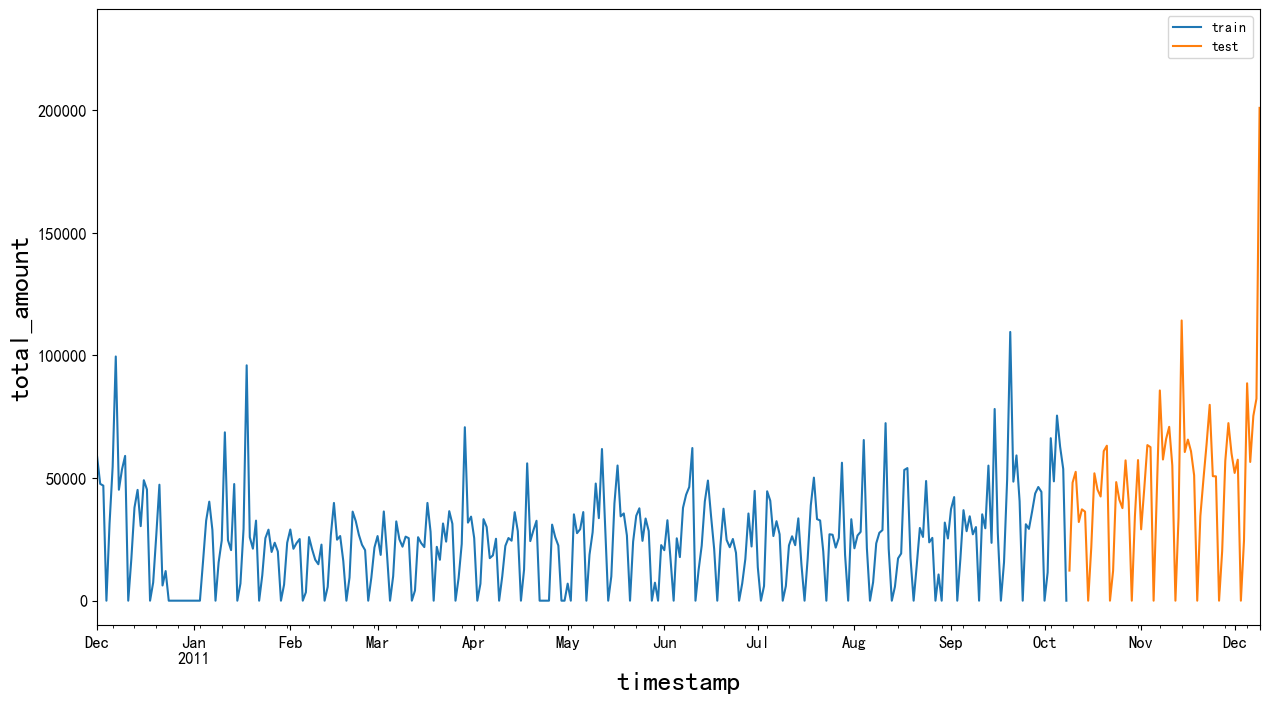

In [83]:
# 可视化差异
df_Invoice[(df_Invoice.index < test_start_dt) & (df_Invoice.index >= train_start_dt)][['total_amount']].rename(columns={'total_amount':'train'}) \
    .join(df_Invoice[test_start_dt:][['total_amount']].rename(columns={'total_amount':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12) #指定 y=['train', 'test'] 表示同时绘制 train 和 test 列。
plt.xlabel('timestamp', fontsize=20)
plt.ylabel('total_amount', fontsize=20)
plt.ylim(top =df_Invoice['total_amount'].max() * 1.2)
plt.show()

#### 3.4 准备训练数据
通过对数据进行筛选和归一化来为模型训练准备数据。筛选需要的时间段和列的数据，并且对其进行归一化，其作用的是将数据投影在0-1之间。

In [84]:
train = df_Invoice.copy()[(df_Invoice.index >= train_start_dt) & (df_Invoice.index < test_start_dt)][['total_amount']]
test = df_Invoice.copy()[df_Invoice.index >= test_start_dt][['total_amount']]
 
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (312, 1)
Test data shape:  (62, 1)


In [85]:
# 使用MinMaxScaler（）对数据进行（0，1）标准化
scaler = MinMaxScaler()
train['total_amount'] = scaler.fit_transform(train[['total_amount']])

# 根据训练好的scaler对测试集进行相同的转换
test['total_amount'] = scaler.transform(test[['total_amount']])
train.head(), test.head()

(            total_amount
 timestamp               
 2010-12-01          0.54
 2010-12-02          0.43
 2010-12-03          0.43
 2010-12-04          0.00
 2010-12-05          0.29,
             total_amount
 timestamp               
 2011-10-09          0.11
 2011-10-10          0.44
 2011-10-11          0.48
 2011-10-12          0.29
 2011-10-13          0.34)

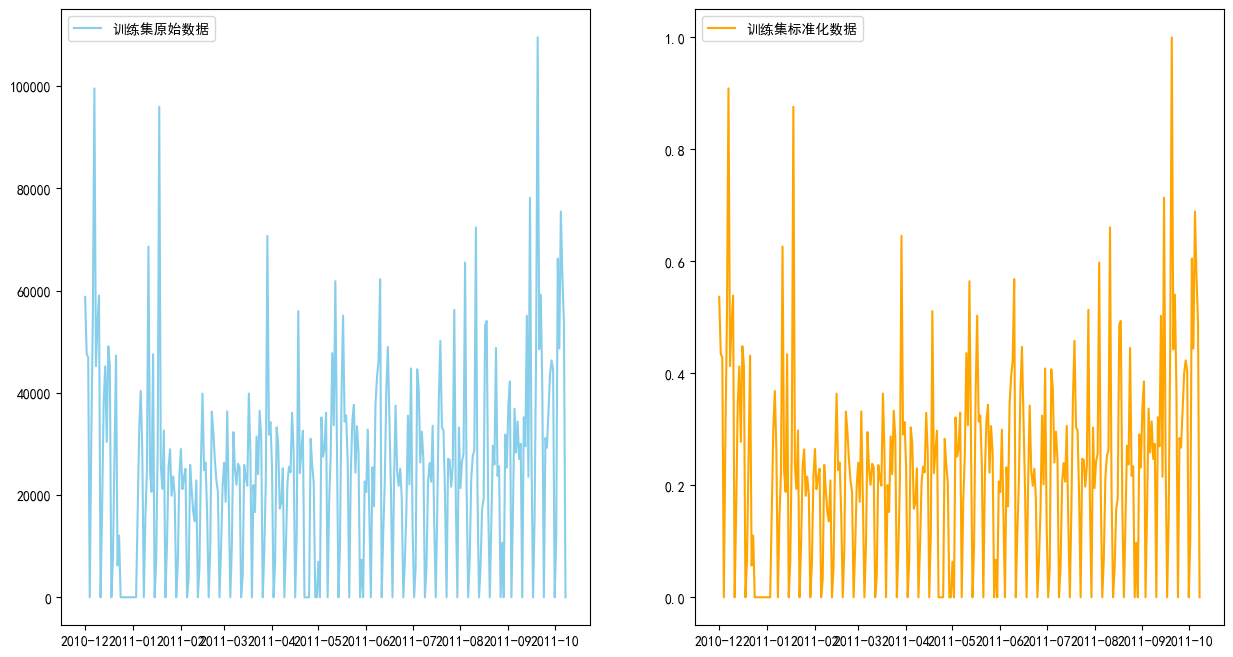

In [86]:
# 原始数据与标准化数据的可视化比较
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(train.index, scaler.inverse_transform(train[['total_amount']]), label='训练集原始数据', color='skyblue')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train.index, train['total_amount'], label='训练集标准化数据', color='orange')

plt.legend()
plt.show()

#### 3.5 稳定性检验
adfuller(Augmented Dickey-Fuller)测试可用于在存在串行相关的情况下在单变量过程中测试单位根。

In [87]:
def adf_val(ts, ts_title):
    '''
    ts: 时间序列数据，Series类型
    ts_title: 时间序列图的标题名称，字符串
    '''     
    # 稳定性（ADF）检验
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(ts)  
 
    name = ['adf', 'pvalue', 'usedlag',
            'nobs', 'critical_values', 'icbest']    
    values = [adf, pvalue, usedlag, nobs, 
              critical_values, icbest]  
    display(list(zip(name, values)))
 
    return adf, pvalue, critical_values,  
    # 返回adf值、adf的p值、三种状态的检验值

In [88]:
# 读取数据
ts_data = train['total_amount'].astype('float32')  
adf, pvalue1, critical_values = adf_val(
          ts_data, 'raw time series')


[('adf', -3.3949635238705618),
 ('pvalue', 0.011131767654596616),
 ('usedlag', 13),
 ('nobs', 298),
 ('critical_values',
  {'1%': -3.4524859843440754,
   '5%': -2.871288184343229,
   '10%': -2.571964047565425}),
 ('icbest', -377.1954233568782)]

ADF检验结果显示，该时间序列在5%显著性水平下平稳（ADF=-3.395 < 5%临界值-2.871，p=0.011 < 0.05），但未达到1%最严格平稳标准。数据已满足ARIMA建模基础要求。  
#### 3.6 白噪声检测
白噪声检验也称为纯随机性检验，当数据是纯随机数据时，再对数据进行分析就没有任何意义了，所以拿到数据后最好对数据进行一个纯随机性检验。
- 数据的纯随机性检验函数  
acorr_ljungbox(x, lags=None, boxpierce=False,   
               model_df=0, period=None,   
               return_df=True, auto_lag=False)  

    参数说明：  
    x: 输入数据  
    lags: 检验的阶数，默认为None，即检验所有阶数  
    boxpierce: 是否返回Box-Pierce检验结果，默认为False  
    model_df: 模型参数个数，默认为0  
    period: 检验的周期数，默认为None  
    return_df: 是否返回DataFrame格式，默认为True  


In [89]:
# def acorr_val(ts):
#     '''
#     # 白噪声（随机性）检验
#     ts: 时间序列数据，Series类型
#     返回白噪声检验的统计量和P值
#     '''
#     # 执行白噪声检验
#     res = acorr_ljungbox(ts, lags=1)
    
#     # 提取统计量和p值（从数组中取第一个元素）
#     lbvalue = res.lb_stat[0]
#     pvalue = res.lb_pvalue[0]
    
#     return lbvalue, pvalue

# # 执行白噪声检验
# lb_stat, p_value = acorr_val(ts_data)

# print(f"Ljung-Box统计量: {lb_stat:.4f}")
# print(f"P值: {p_value:.4f}")

# # 结果解读
# if p_value > 0.05:
#     print("无法拒绝原假设：序列是白噪声")
# else:
#     print("拒绝原假设：序列不是白噪声")

In [90]:
display(ts_data)

timestamp
2010-12-01   0.54
2010-12-02   0.43
2010-12-03   0.43
2010-12-04   0.00
2010-12-05   0.29
             ... 
2011-10-04   0.44
2011-10-05   0.69
2011-10-06   0.57
2011-10-07   0.49
2011-10-08   0.00
Name: total_amount, Length: 312, dtype: float32

#### 3.7 ARIMA模型
使用statsmodels 库创建 ARIMA 模型。并遵循以下几个步骤。  
1. 通过调用SARIMAX()并传入模型参数： p, d, q参数，以及 P, D, Q参数定义模型。
2. 通过调用fit()函数为训练数据准备模型。
3. 通过调用forecast()函数进行预测，并指定要预测的步骤数(horizon)。  
- p：与模型的自回归方面相关的参数，模型中包含的滞后观测数，也称为滞后阶数。
- d：与模型集成部分相关的参数，原始观测值差异的次数，也称为差异度。它影响到应用于时间序列的差分的数量。
- q：与模型的移动平均部分相关的参数。移动平均窗口的大小，也称为移动平均的阶数。  
##### 3.7.1 确定时间序列的差分

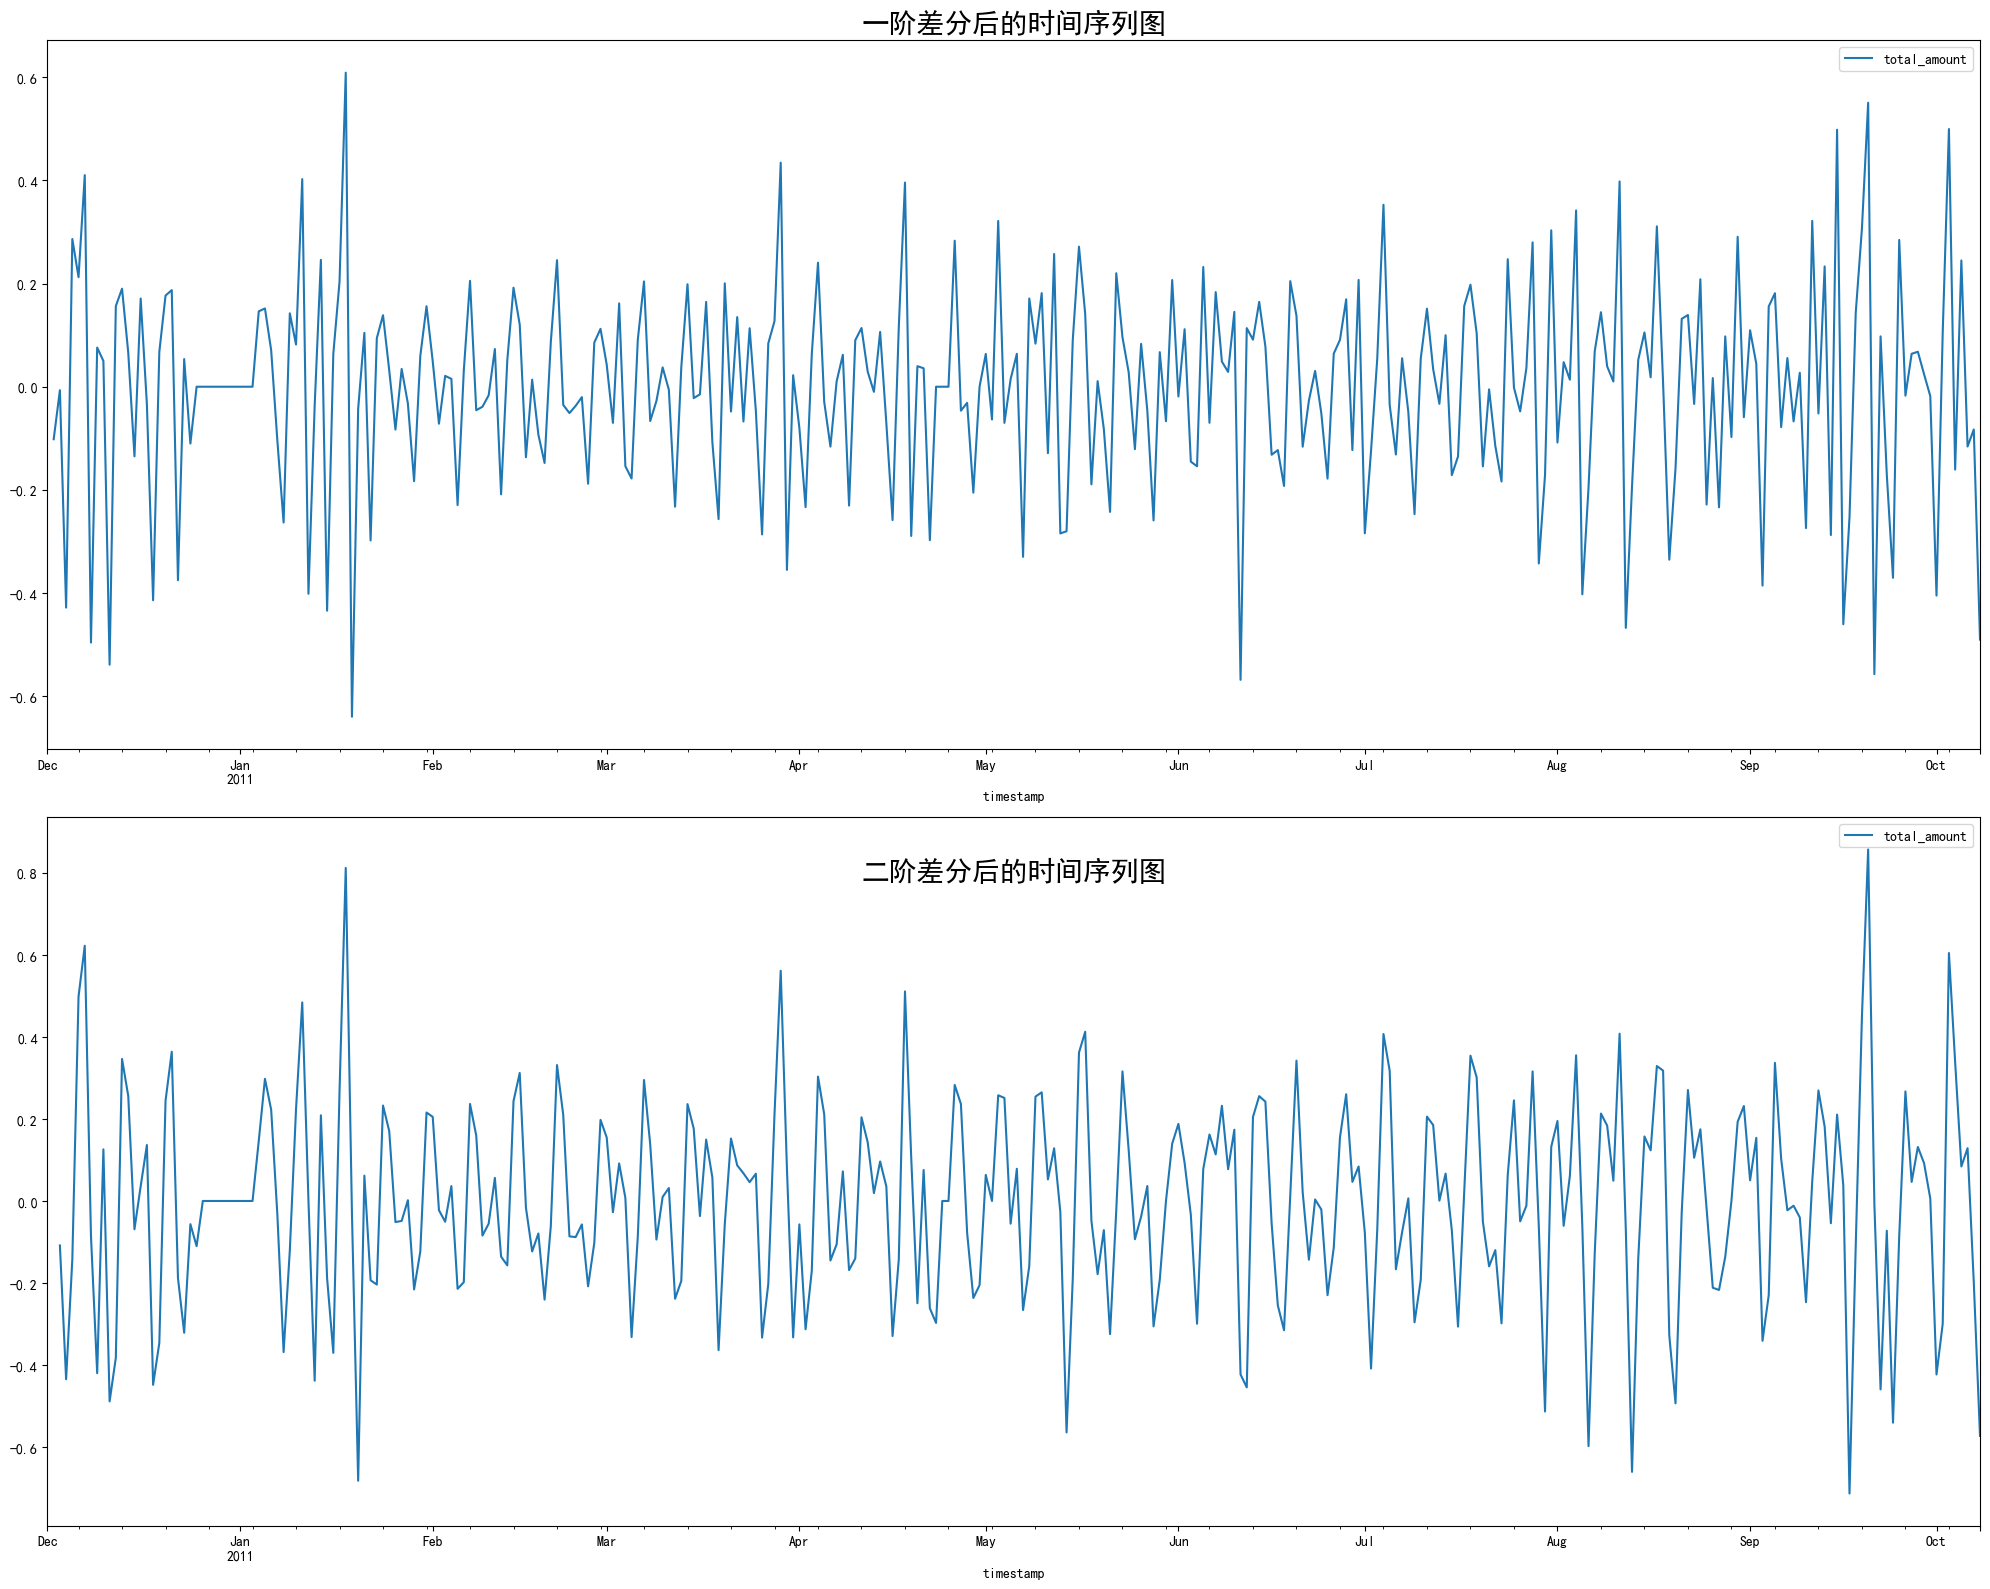

In [91]:
# # 确定时间序列的差分
# def difference(dataset, interval=1):
#     diff = list()
#     for i in range(interval, len(dataset)):
#         value = dataset[i] - dataset[i - interval]
#         diff.append(value)
#     return np.array(diff)
# # 对原始数据进行差分
# diff_data = difference(ts_data, 1)
# # 绘制差分后的时间序列图
# plt.figure(figsize=(15, 6))
# plt.plot(diff_data, label='差分后的时间序列', color='skyblue')
# plt.title('差分后的时间序列图')
# plt.xlabel('时间点') 
# plt.ylabel('差分值')
# plt.legend()
# plt.show()
fig = plt.figure(figsize=(20,16))
ax1= fig.add_subplot(211)
diff1 = train.diff(1)
diff1.plot(ax=ax1)
plt.title('一阶差分后的时间序列图', fontsize=20)
plt.tight_layout()
ax2= fig.add_subplot(212)
diff2 = train.diff(2)
diff2.plot(ax=ax2)
plt.tight_layout()
plt.title('二阶差分后的时间序列图', fontsize=20,y = 0.9)

plt.show()

可以看出一阶差分的时间序列的均值和方差已经基本平稳，二阶差分后的时间序列与一阶差分相差不大，并且二者随着时间推移，时间序列的均值和方差保持不变。因此可以将差分次数  设置为1。

##### 3.7.2 模式识别（自相关系数ACF与偏自相关系数PACF）
- 自相关（Autocorrelation）： 
对一个时间序列，现在值与其过去值的相关性。如果相关性为正，则说明现有趋势将继续保持。

- 偏自相关（Partial Autocorrelation）： 
可以度量现在值与过去值更纯正的相关性。

- ACF 和 PACF 图： 
通过差分对时间序列进行平稳化后，拟合 ARIMA 模型的下一步是确定是否需要 AR 或 MA 项来校正差分序列中剩余的任何自相关。结合自相关图和偏自相关图共同进行判断时间序列模型。

| 模型         | 自相关图（ACF）特征 | 偏自相关图（PACF）特征 |
|--------------|---------------------|------------------------|
| **AR(p)**    | 拖尾                | p阶截尾               |
| **MA(q)**    | q阶截尾            | 拖尾                   |
| **ARMA(p,q)**| 拖尾                | 拖尾                   |
| **模型不适合**| 截尾                | 截尾                   |

拖尾和截尾说明如下：  

- 拖尾： 始终有非零取值，不会在大于某阶后就快速趋近于0（而是在0附近波动），可简单理解为无论如何都不会为0，而是在某阶之后在0附近随机变化。  

- 截尾： 在大于某阶(k)后快速趋于0为k阶截尾，可简单理解为从某阶之后直接就变为0。

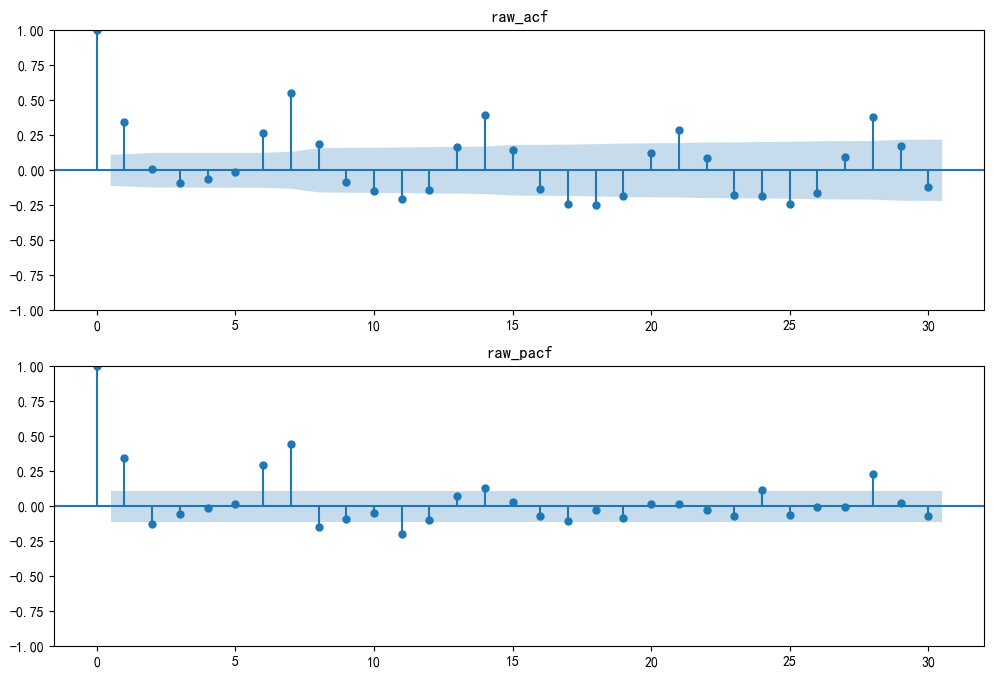

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 1, figsize=(12, 4*2))
# 自相关
plot_acf(train['total_amount'],lags=30,title='raw_acf', ax=axes[0])  
# 偏自相关
plot_pacf(train['total_amount'],lags=30,title='raw_pacf', ax=axes[1])  
plt.show()
# 其中lags 表示滞后的阶数，以上分别得到acf 图和pacf 图。

由于该时间序列数据的 ACF 和 PACF 都拖尾，初步判断更适合使用ARMA (p,q) 模型来拟合 。但实际应用中，还需进一步通过信息准则（如 AIC、BIC ）等方法确定合适的 p 和 q 值，对模型进行定阶和优化。
- AIC：   赤池信息量 akaike information criterion

- BIC： 贝叶斯信息量 bayesian information criterion

##### 3.7.4 参数确定（手动选择参数）
为ARIMA模型的参数选择最佳值可能是一个挑战，因为这有点主观，也有点耗时。可以考虑使用'pyramid'库 中的 'auto_arima()' 函数。

In [93]:
# 指定要提前预测的步骤数
HORIZON = 3
print('Forecasting horizon:', HORIZON, 'days')

Forecasting horizon: 3 days


In [94]:
order = (4, 1, 0)
seasonal_order = (1, 1, 0, 24)
 
model = SARIMAX(endog=train, order=order, 
                seasonal_order=seasonal_order)
results = model.fit()
 
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       total_amount   No. Observations:                  312
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 24)   Log Likelihood                  47.451
Date:                            Mon, 02 Jun 2025   AIC                            -82.901
Time:                                    18:08:40   BIC                            -60.944
Sample:                                12-01-2010   HQIC                           -74.101
                                     - 10-08-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4758      0.060     -7.923      0.000      -0.594      -0.358
ar.L2         -0.4269      0.063   

##### 3.7.5 训练ARIMA模型


In [106]:

from pmdarima import auto_arima
# 自动搜索最优ARIMA参数
from pmdarima import auto_arima
model = auto_arima(train, seasonal=True,m = 12)  # 非季节性ARMA
print("最优模型参数:", model.order)  # 输出(p,d,q)
print(model.summary())




最优模型参数: (5, 1, 2)
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  312
Model:             SARIMAX(5, 1, 2)x(1, 0, 2, 12)   Log Likelihood                 187.534
Date:                            Mon, 02 Jun 2025   AIC                           -353.068
Time:                                    18:16:47   BIC                           -311.930
Sample:                                12-01-2010   HQIC                          -336.624
                                     - 10-08-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3555      0.075      4.756      0.000       0.209       0.502
ar.L2         -0.

In [107]:
# 用最优参数拟合模型
final_model = ARIMA(train, order=model.order)
fitted_model = final_model.fit()

# 预测测试集
forecast = fitted_model.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()  # 置信区间

# 评估指标
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test, forecast_values)
rmse = np.sqrt(mean_squared_error(test, forecast_values))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 0.16, RMSE: 0.26


##### 3.7.6 可视化预测结果

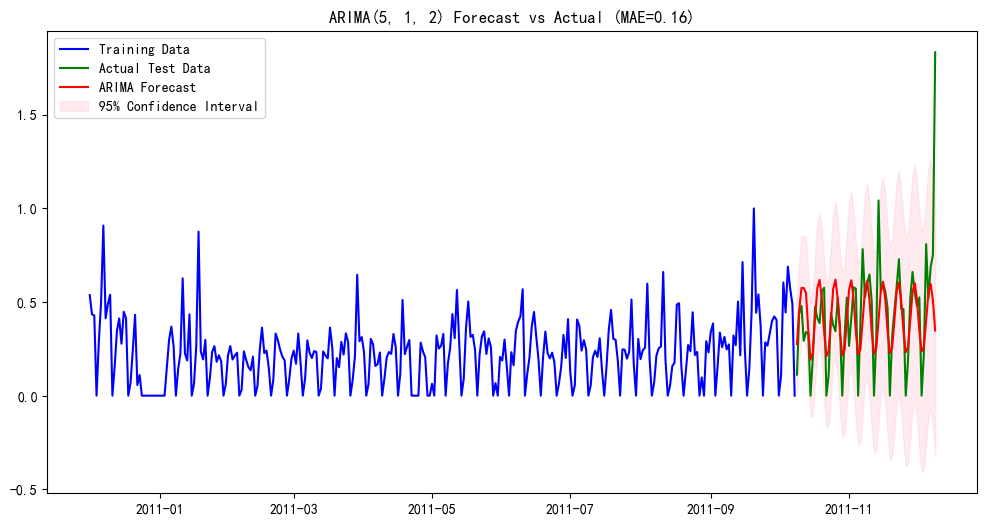

In [108]:
#可视化预测结果
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Actual Test Data', color='green')
plt.plot(forecast_values, label='ARIMA Forecast', color='red')
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink', alpha=0.3, label='95% Confidence Interval'
)
plt.legend()
plt.title(f"ARIMA{model.order} Forecast vs Actual (MAE={mae:.2f})")
plt.show()

##### 3.7.7 残差诊断


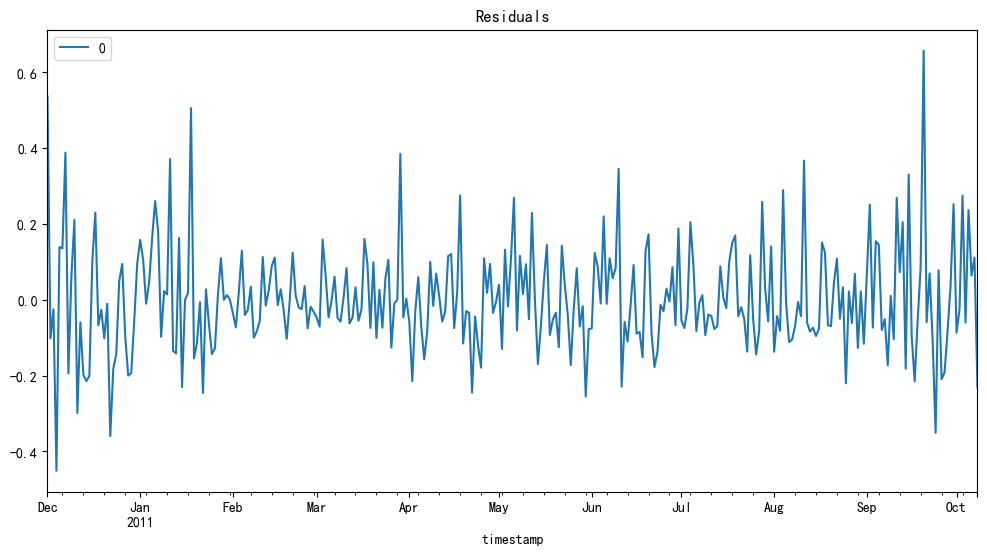

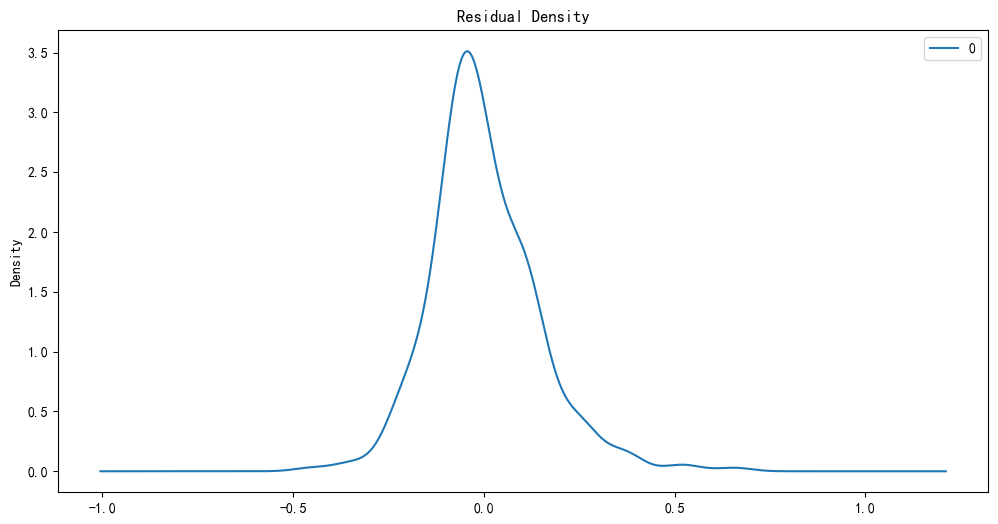

残差白噪声检验p值: 0.0014496301844541379


In [110]:
# 残差分析
residuals = pd.DataFrame(fitted_model.resid)

# 残差图
plt.figure(figsize=(12, 6))
residuals.plot(title="Residuals", ax=plt.gca())
plt.show()

# 残差分布
residuals.plot(kind='kde', title='Residual Density')
plt.show()

# 残差自相关检验（应为白噪声）
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=[10])
print("残差白噪声检验p值:", lb_test.iloc[0, 1])  # p>0.05说明残差是白噪声

##### 3.7.8 未来预测（样本外）

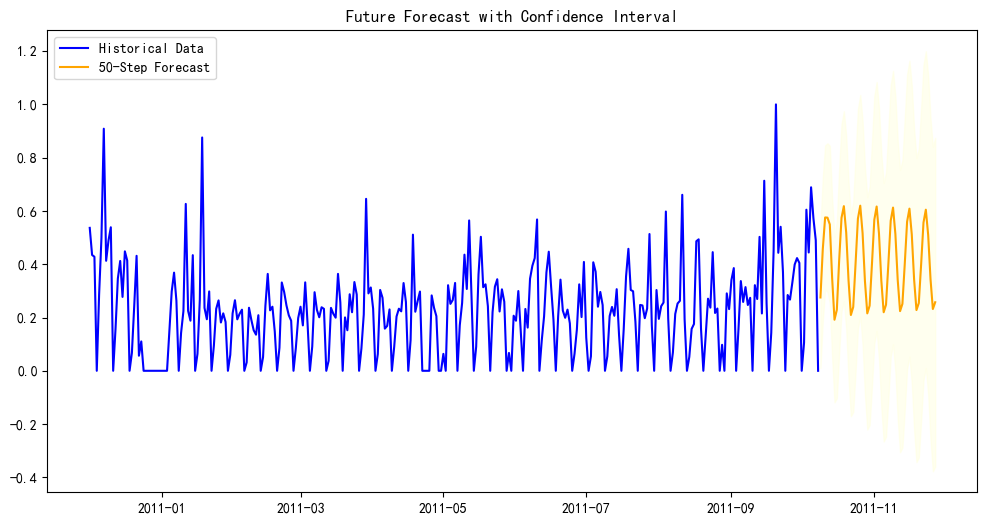

In [115]:
# 预测未来n步
future_steps = 50
future_forecast = fitted_model.get_forecast(steps=future_steps)
future_values = future_forecast.predicted_mean

# 可视化未来预测
plt.figure(figsize=(12, 6))
plt.plot(train['total_amount'], label='Historical Data', color='blue')
plt.plot(future_values, label=f'{future_steps}-Step Forecast', color='orange')
plt.fill_between(
    future_values.index,
    future_forecast.conf_int().iloc[:, 0],
    future_forecast.conf_int().iloc[:, 1],
    color='lightyellow', alpha=0.5
)
plt.legend()
plt.title("Future Forecast with Confidence Interval")
plt.show()